In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hebb_2 import Neuron, NeuralNetwork
from util import show_history, animate, plot_connections

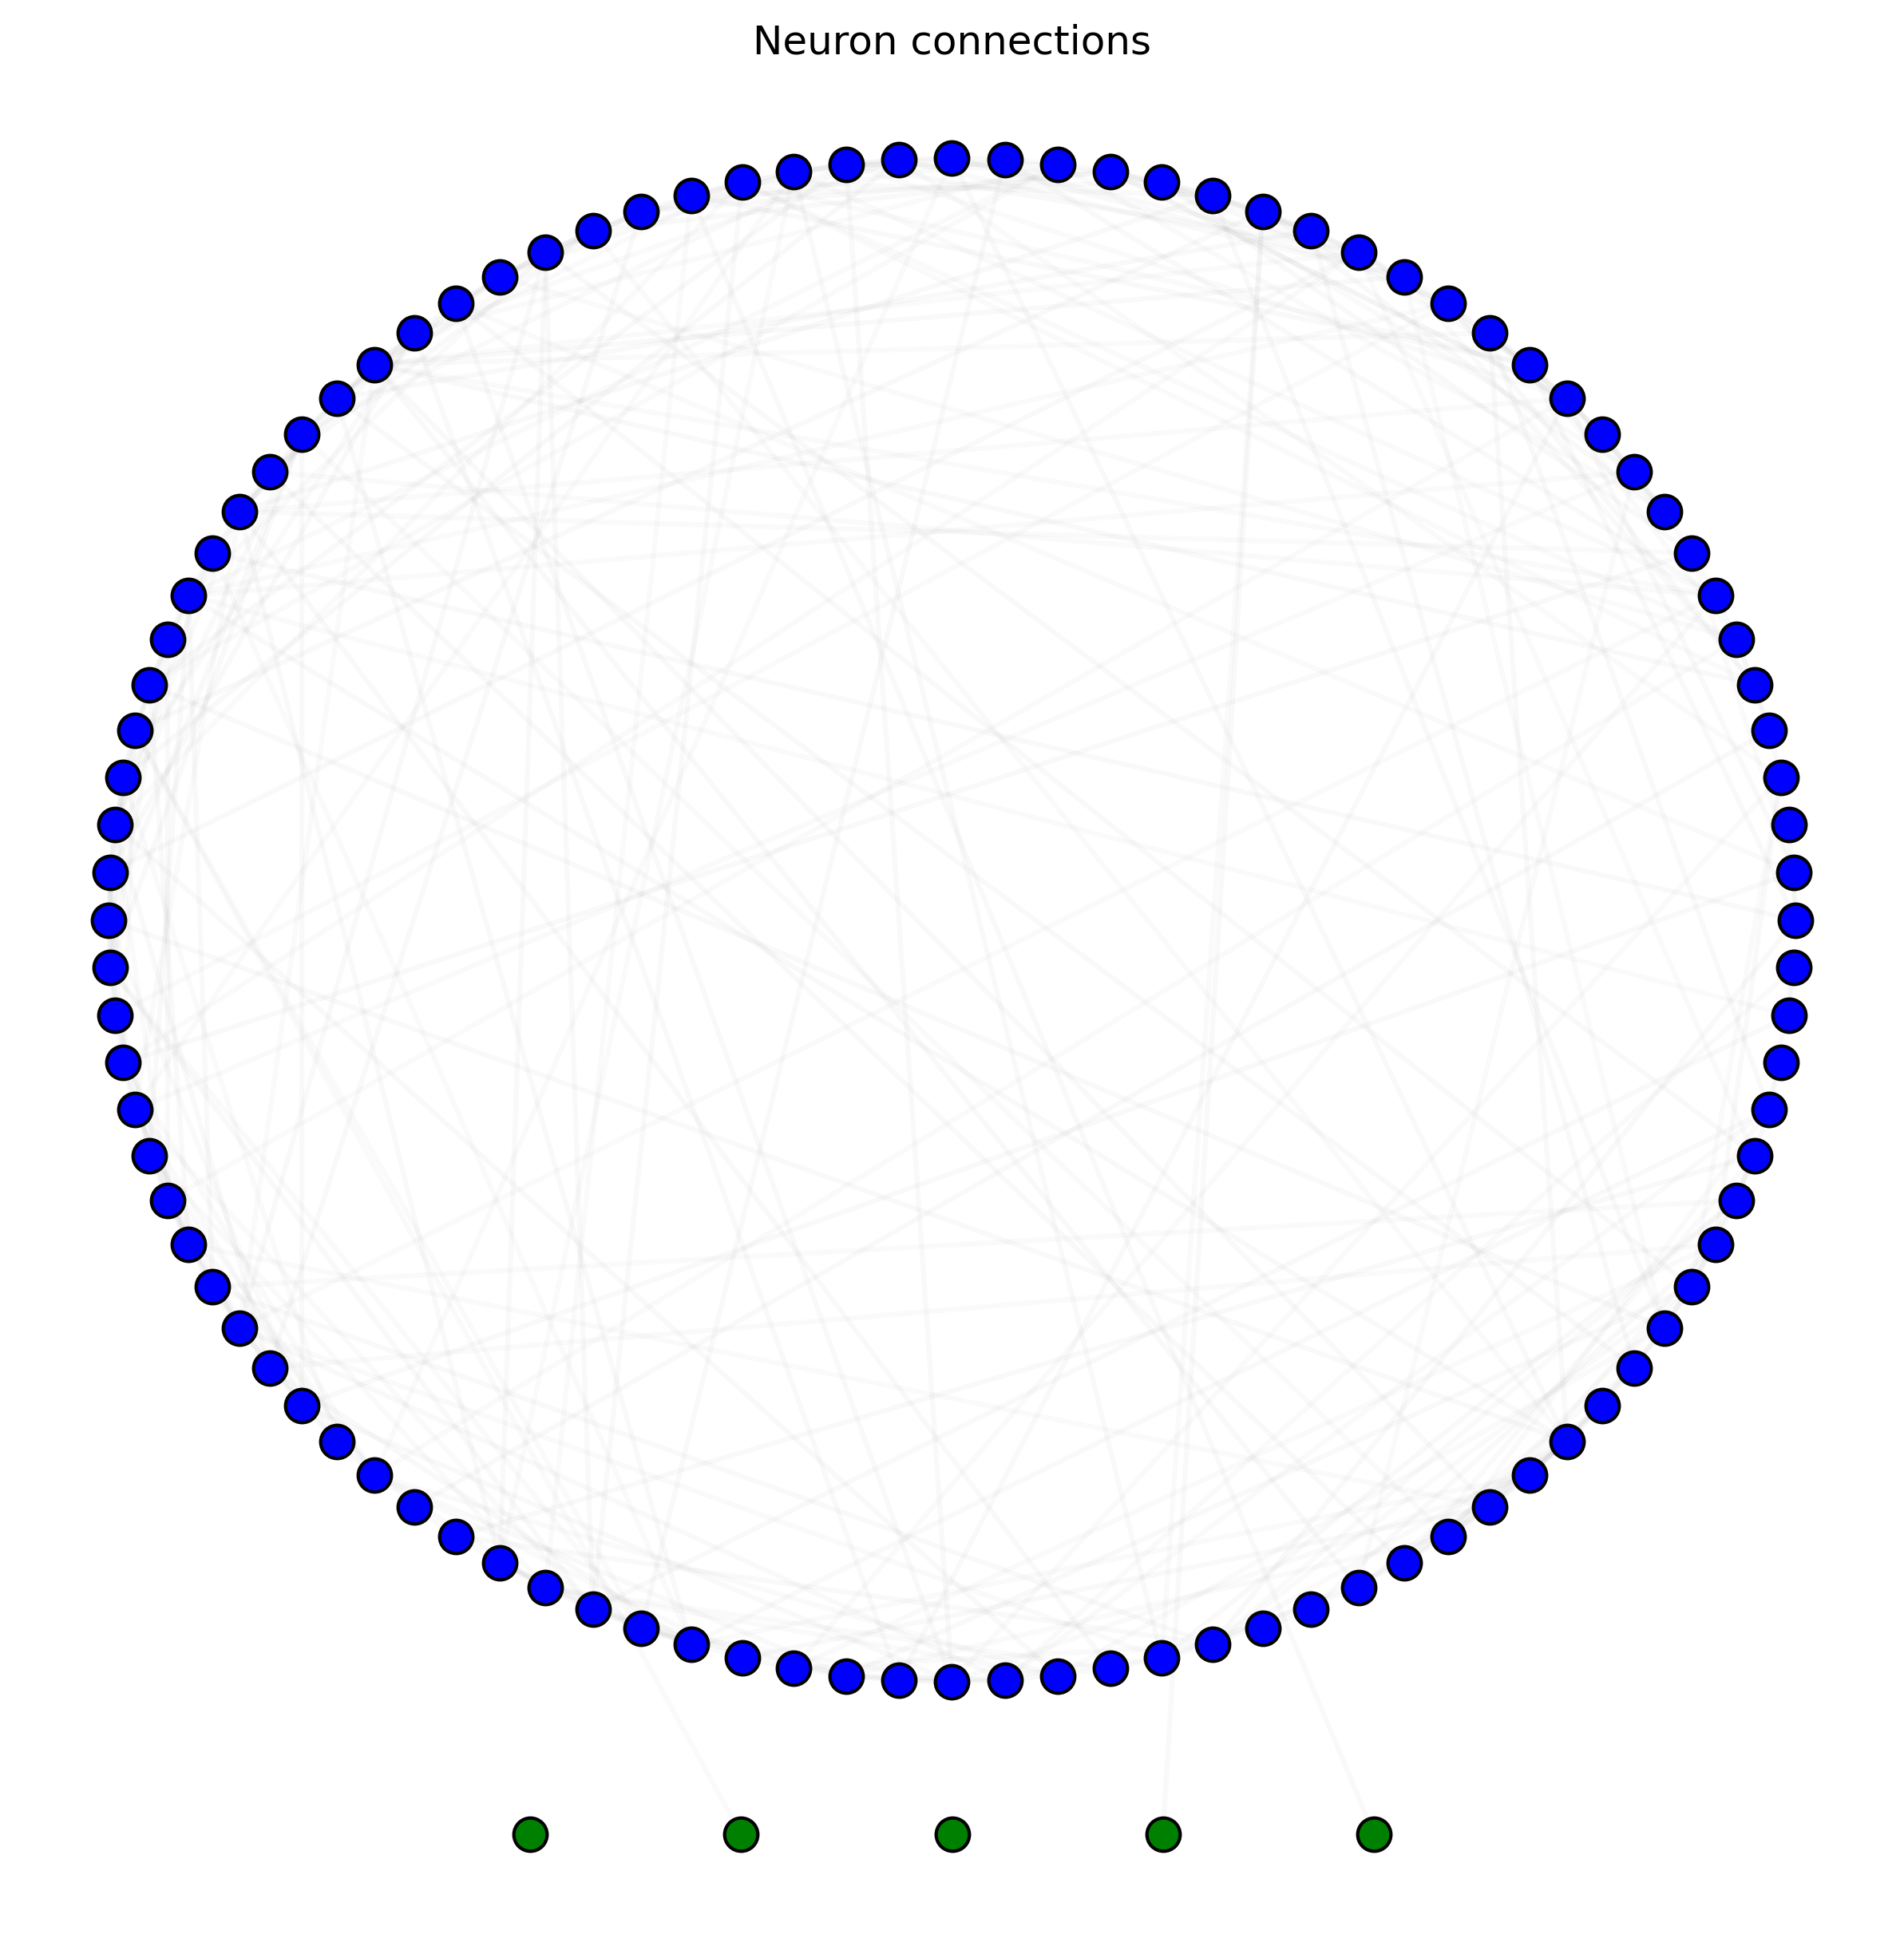

In [99]:
# Original network
network = NeuralNetwork(size=100, input_size=5, threshold=1.0, decay_factor=0.9972)
#network.connect_by_group(connection_probability=0.55, weight_range=(0.18, 0.23))
#network.connect_randomly(connection_probability=0.01, weight_range=(0.18, 0.23))
network.connect_by_location(connection_probability=0.8, weight_range=(0.18, 0.23))
network.set_learning_rate(learning_rate=0.8)
plot_connections(network)

# Bigger network
#network = NeuralNetwork(size=300, input_size=5, threshold=1.0, decay_factor=0.9972)
#network.connect_randomly(connection_probability=0.025, weight_range=(0.18, 0.23))

# Set inputs
arr = np.vstack((np.ones((1, 5)), np.zeros((9, 5))))
input_pattern_1 = np.tile(arr, (100, 1))

input_pattern_2 = np.zeros((1000, 5))

arr = np.asarray([[1.0, 0.0, 0.0, 0.0, 0.0],
                  [0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 1.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 1.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])
input_pattern_3 = np.tile(arr, (200, 1))
network.set_input_pattern(input_pattern_3)

input_pattern = np.vstack((input_pattern_1, input_pattern_2, input_pattern_3))

input_pattern = np.vstack((input_pattern_1,input_pattern_1,input_pattern_1,input_pattern_1,input_pattern_1,input_pattern_1))

network.set_input_pattern(input_pattern)

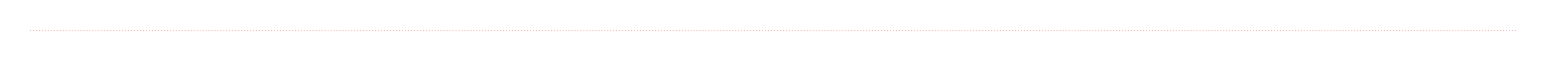

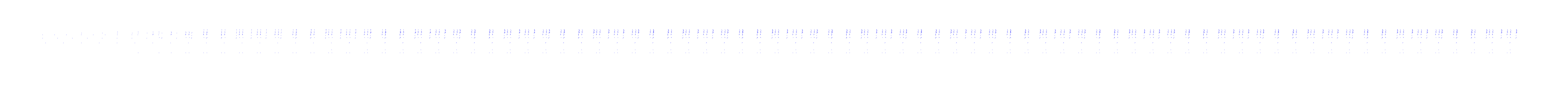

In [100]:
input_neuron_history, neuron_history = network.simulate(iterations=5000)

# Show network history
start_itr = 0
end_itr = 5000
show_history(network, input_neuron_history[start_itr:end_itr], neuron_history[start_itr:end_itr])

In [101]:
step = 3000

weights = network.weight_history[step]
firing_status = network.firing_history[step]
num_inputs = len(network.input_neurons)

In [102]:
def plot_weights(weights, firing_status, num_inputs):

    grid_dim = len(weights)
    arr = np.empty((grid_dim, grid_dim+1))
    arr[:] = np.nan

    # Plot firing status in column 1
    for i in range(grid_dim):
        # Use a lighter color for input neurons
        if i < num_inputs:
            arr[i, 0] = -0.5*firing_status[i]

        else:
            arr[i, 0] = -firing_status[i]

    # Plot neuron weights from column 2 to last
    for i in range(grid_dim):   # Iterate through all neurons
        for tup in weights[i]:  # Iterate through connections of given neuron
            j = tup[0]          # Index of the connected neuron
            weight = tup[1]

            arr[i, j+1] = weight

    plt.imshow(arr, cmap="RdBu", vmin=-1.0, vmax=1.0)
    plt.colorbar()
    plt.axis("off")
    plt.show()

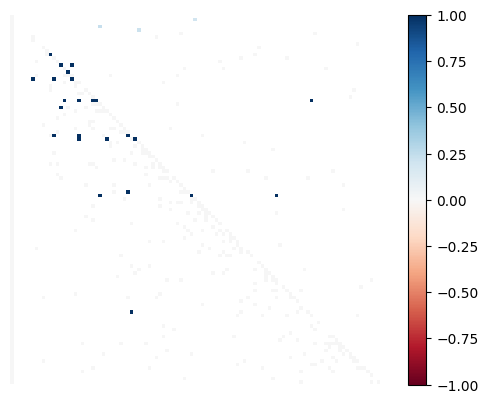

In [103]:
plot_weights(weights, firing_status, num_inputs)

In [104]:
from IPython.display import clear_output
import time

for idx in range(1800, 1900):

    weights = network.weight_history[idx]
    firing_status = network.firing_history[idx]
    
    plt.cla() 
    plot_weights(weights, firing_status, num_inputs)
    clear_output(wait=True)
    time.sleep(0.1)

KeyboardInterrupt: 

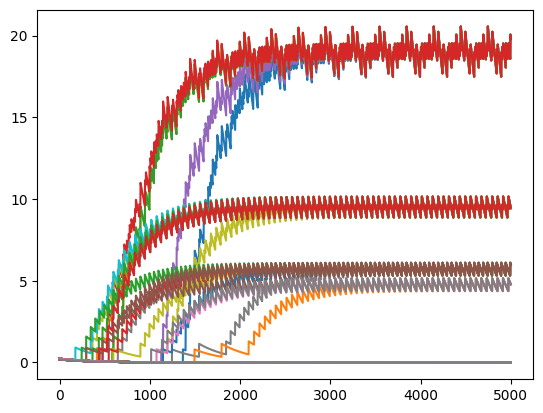

In [106]:
num_inputs = 5
total_steps = 5000

for i in range(100): # Let i run over all the non-input neurons
    for j in range(len(network.neurons[i].connections)):  
        weights = []
        for step in range(total_steps):
            weights.append(network.weight_history[step][i+num_inputs][j]) # Remember that weight history is for all neurons, so ith regular neuron is at position i+num_inputs

        plt.plot([tup[1] for tup in weights])

plt.show()